In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import folium

%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Chicago_Crimes_2012_to_2017.csv']


In [2]:
df = pd.read_csv('../input/Chicago_Crimes_2012_to_2017.csv')
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


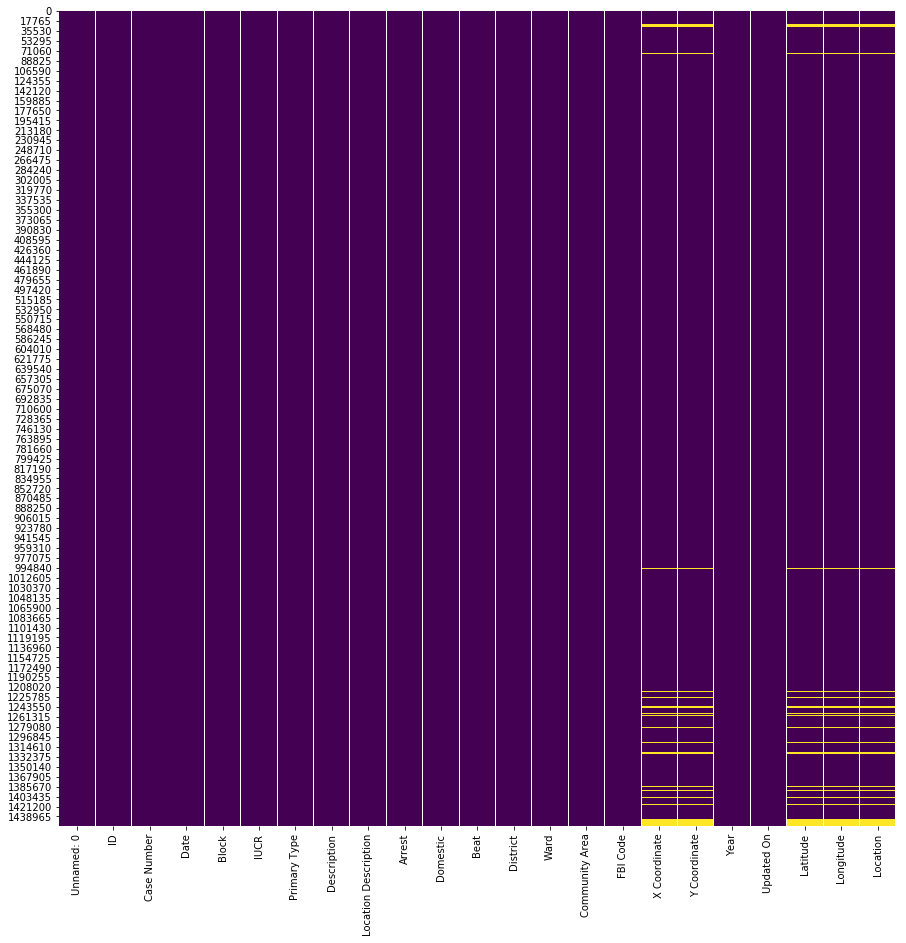

In [3]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')

In [4]:
df = df.dropna()
df = df.drop(columns=['Unnamed: 0', 'ID', 'Case Number', 'Block', 'IUCR','Domestic', 'Beat', 'District', 'Ward','X Coordinate', 'Y Coordinate','Updated On', 'FBI Code'], axis = 1)

In [5]:
pd.value_counts(df['Location Description'])[:15]

STREET                            325084
RESIDENCE                         223854
APARTMENT                         179444
SIDEWALK                          158478
OTHER                              53474
PARKING LOT/GARAGE(NON.RESID.)     40907
ALLEY                              31239
RESIDENTIAL YARD (FRONT/BACK)      30209
SMALL RETAIL STORE                 28209
SCHOOL, PUBLIC, BUILDING           25474
RESIDENCE-GARAGE                   25256
RESTAURANT                         25196
RESIDENCE PORCH/HALLWAY            25001
VEHICLE NON-COMMERCIAL             23996
DEPARTMENT STORE                   20360
Name: Location Description, dtype: int64

In [6]:
pd.value_counts(df['Primary Type'])[:15]

THEFT                         321950
BATTERY                       258941
CRIMINAL DAMAGE               152812
NARCOTICS                     131177
ASSAULT                        89508
OTHER OFFENSE                  85361
BURGLARY                       81668
DECEPTIVE PRACTICE             67609
MOTOR VEHICLE THEFT            59856
ROBBERY                        56092
CRIMINAL TRESPASS              36429
WEAPONS VIOLATION              16983
PUBLIC PEACE VIOLATION         13015
OFFENSE INVOLVING CHILDREN     10590
PROSTITUTION                    7567
Name: Primary Type, dtype: int64

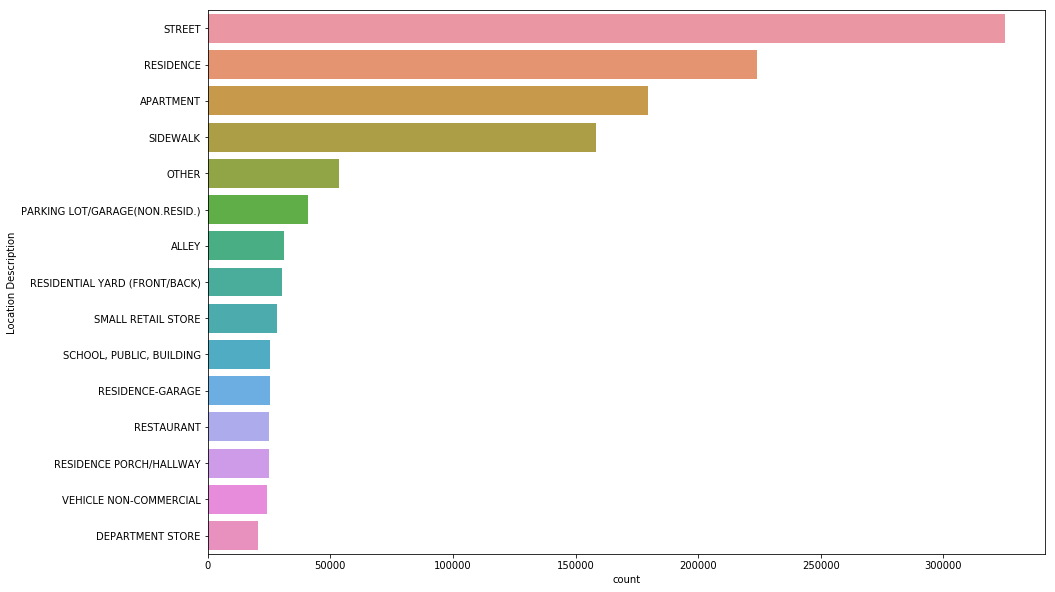

In [7]:
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Location Description', data = df, order = df['Location Description'].value_counts().iloc[:15].index)

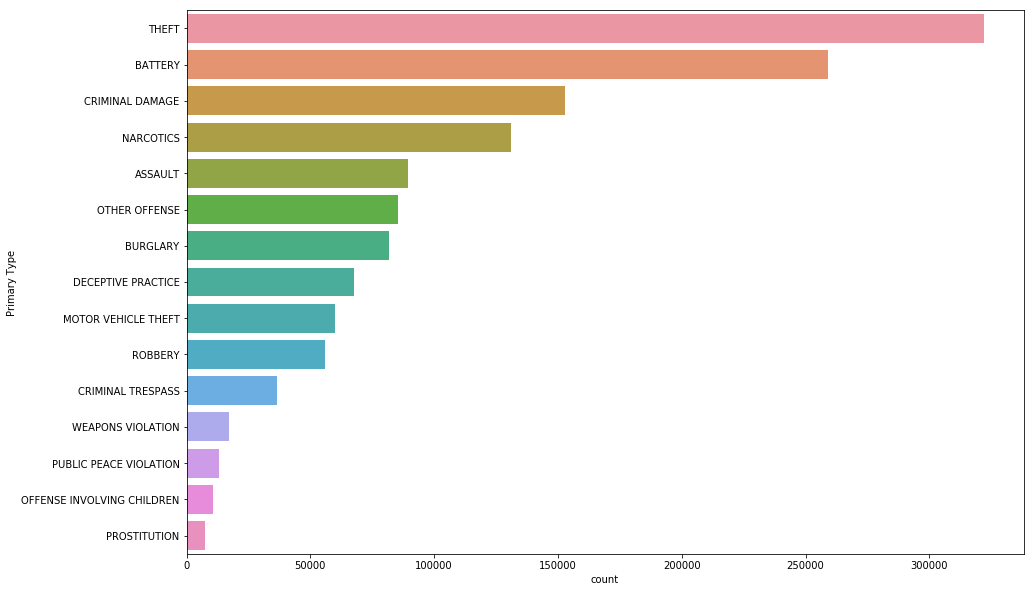

In [8]:
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Primary Type', data = df, order = df['Primary Type'].value_counts().iloc[:15].index)

In [94]:
chicago_map = folium.Map(location=[41.864073,-87.706819], zoom_start=11, tiles = "CartoDB dark_matter")#Stamen Toner
chicago_map

In [82]:
chicago_map = folium.Map(location=[41.864073,-87.706819], zoom_start=11, tiles = "Stamen Toner")#CartoDB dark_matter
chicago_map

In [83]:
locations = df.groupby('Community Area').first()
locations.head()

,Date,Primary Type,Description,Location Description,Arrest,Year,Latitude,Longitude,Location
Community Area,,,,,,,,,
0.0,02/19/2012 06:54:00 PM,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,RESIDENCE-GARAGE,False,2012,41.799090,-87.790549,"(41.799089601, -87.790549465)"
1.0,05/03/2016 04:00:00 PM,BATTERY,SIMPLE,SIDEWALK,False,2016,41.998131,-87.665814,"(41.99813061, -87.665814038)"
2.0,05/03/2016 10:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,2016,41.999731,-87.705810,"(41.99973106, -87.705809711)"
3.0,05/03/2016 09:35:00 PM,ASSAULT,SIMPLE,HOSPITAL BUILDING/GROUNDS,False,2016,41.972843,-87.671127,"(41.972843435, -87.671127232)"
4.0,05/04/2016 12:01:00 AM,CRIMINAL DAMAGE,TO VEHICLE,RESIDENTIAL YARD (FRONT/BACK),False,2016,41.981316,-87.695119,"(41.9813162, -87.695118674)"


In [84]:
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]
new_locations.head()

,Latitude,Longitude,Location Description,Arrest
Community Area,,,,
0.0,41.799090,-87.790549,RESIDENCE-GARAGE,False
1.0,41.998131,-87.665814,SIDEWALK,False
2.0,41.999731,-87.705810,STREET,False
3.0,41.972843,-87.671127,HOSPITAL BUILDING/GROUNDS,False
4.0,41.981316,-87.695119,RESIDENTIAL YARD (FRONT/BACK),False


In [99]:
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {} <br><br>
                Arrest : {}<br><br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], radius = 5, popup = popup_text, fill = True, line_color='#3186cc').add_to(chicago_map)

In [100]:
chicago_map